
Using 'accident_occurred' as the target column

Decision tree Classification Report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



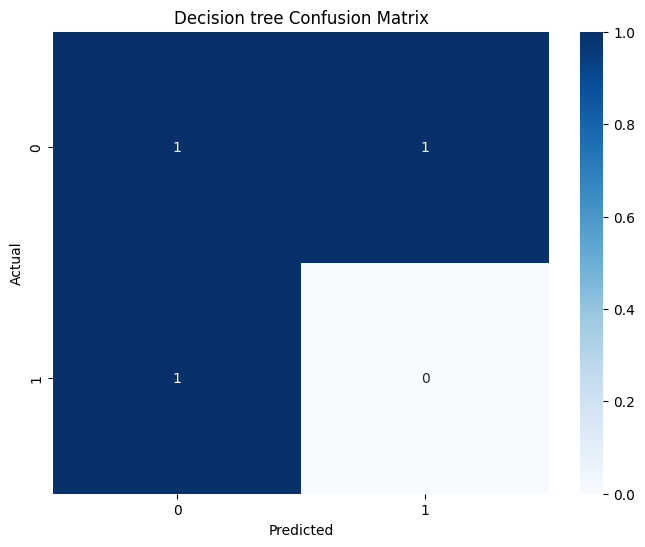

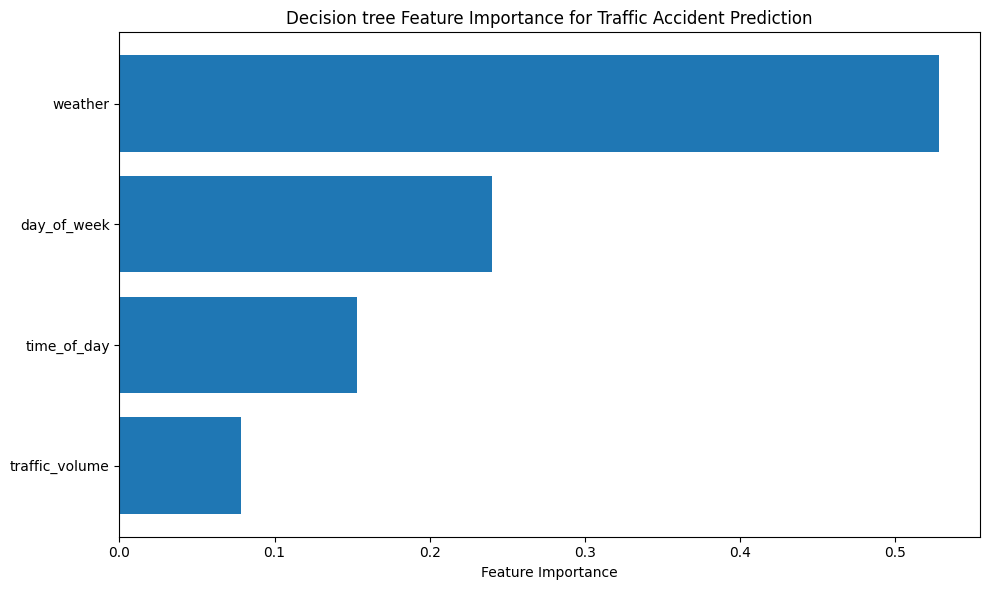


Random Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



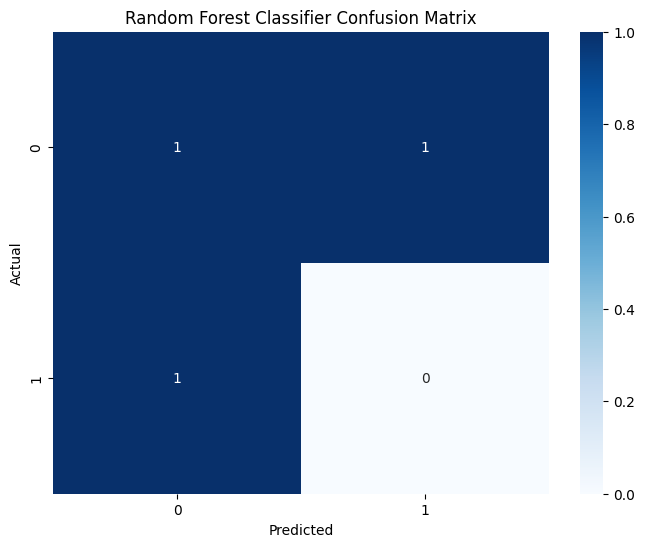

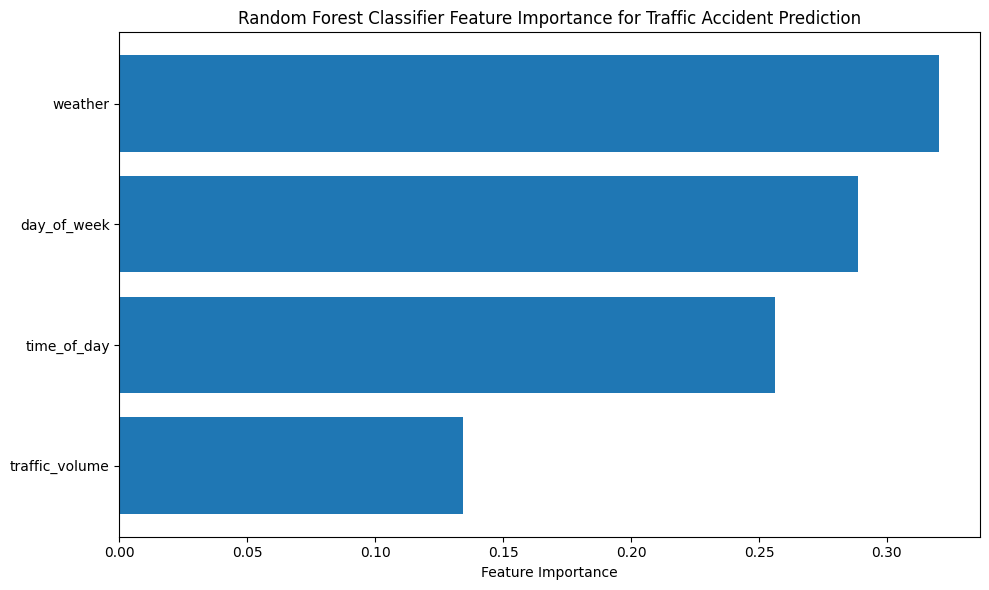


descriptive Conclusions
1.Model Performances
   Decision Tree accuracy: 33.33%
   Random Forest accuracy: 33.33%

2.Model Comparisons
   - Both models performed equally, suggesting a relatively simple underlying pattern in the data.

3.Key Findings
The most important factor in predicting traffic accidents (according to Random Forest) is weather. 


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv('traffic_data.csv')
#print(df.head())
#print("dataset information\n")
#print(df.info())
target_column = df.columns[-1]
print(f"\nUsing '{target_column}' as the target column")
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype=='object':
        df[column]= le.fit_transform(df[column])
X=df.drop(target_column,axis=1)
y=df[target_column]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
def train_evaluate(model,X_train,X_test,y_train,y_test,model_name):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"\n{model_name} Classification Report")
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    feature_importance = model.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(10, 6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, feature_names[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title(f'{model_name} Feature Importance for Traffic Accident Prediction')
    plt.tight_layout()
    plt.show()
    return model,accuracy_score(y_test,y_pred)
dt_model,dt_accuracy=train_evaluate(DecisionTreeClassifier(random_state=42),X_train,X_test,y_train,y_test,"Decision tree")
rf_model,rf_accuracy=train_evaluate(RandomForestClassifier(n_estimators=100,random_state=42),X_train,X_test,y_train,y_test,"Random Forest Classifier")
print("\ndescriptive Conclusions")
print("1.Model Performances")
print(f"   Decision Tree accuracy: {dt_accuracy:.2%}")
print(f"   Random Forest accuracy: {rf_accuracy:.2%}")
print("\n2.Model Comparisons")
if rf_accuracy>dt_accuracy:
     print("   - Random Forest outperformed Decision Tree, suggesting it captures more complex patterns in the data.")
elif rf_accuracy<dt_accuracy:
         print("   - Decision Tree outperformed Random Forest, which is unusual and might indicate overfitting or a very simple underlying pattern.")
    
else:
     print("   - Both models performed equally, suggesting a relatively simple underlying pattern in the data.")
print("\n3.Key Findings")
rf_most_important_feature=X.columns[rf_model.feature_importances_.argmax()]
print(f"The most important factor in predicting traffic accidents (according to Random Forest) is {rf_most_important_feature}. ")     


